In [1]:
import numpy as np
import pandas as pd

In [2]:
from evaluator import Evaluator

In [3]:
# Generate data
np.random.seed(0)
n_samples_1 = 100
n_samples_2 = 50
data_1 = np.random.normal(loc=0.25, scale=0.2, size=n_samples_1)
data_2 = np.random.normal(loc=0.75, scale=0.2, size=n_samples_2)

# Labels (0 for the first distribution, 1 for the second)
labels_1 = np.zeros(n_samples_1, dtype=int)
labels_2 = np.ones(n_samples_2, dtype=int)

# Combine the data
preds = np.concatenate([data_1, data_2])
labels = np.concatenate([labels_1, labels_2])

# Threshold for predictions
threshold = 0.5

# Create & Shuffle dataFrame
df = pd.DataFrame({'pred': preds, 'label': labels})
df['label_pred'] = (df['pred'] >= threshold).astype(int)
df = df.sample(frac=1).reset_index(drop=True)

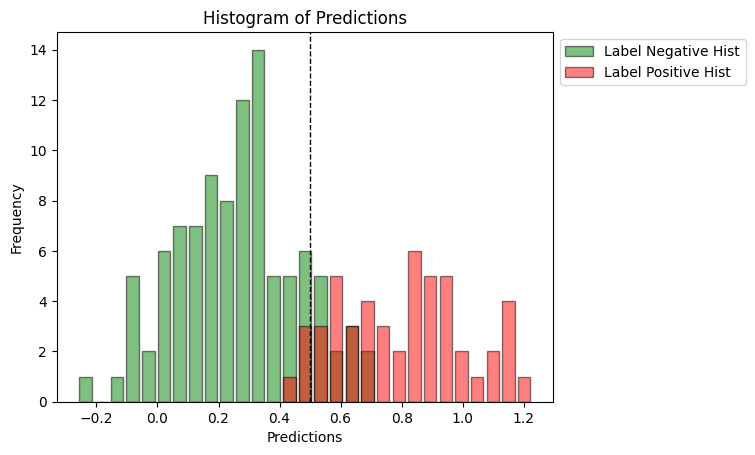

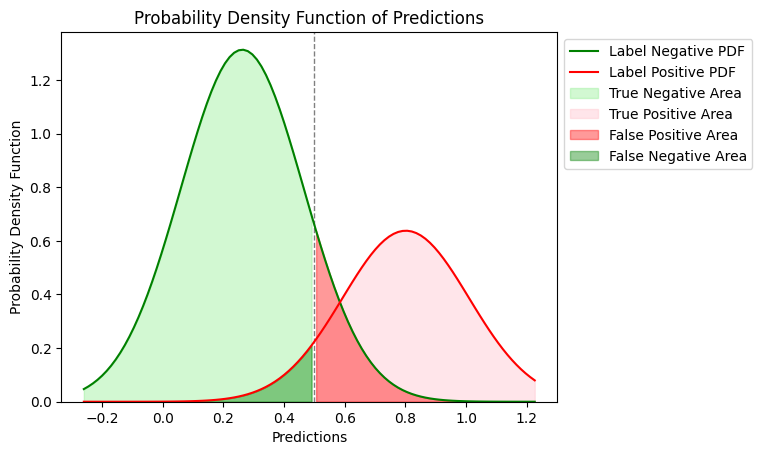

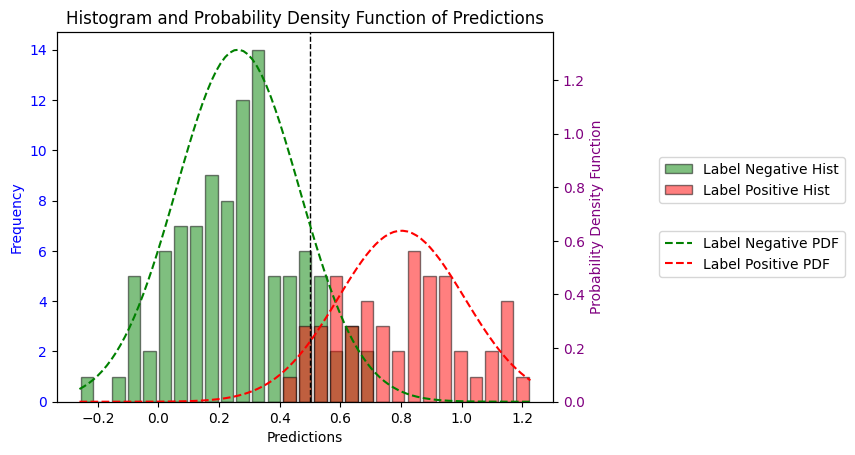

In [4]:
evaluator = Evaluator(df, threshold)

# Now you can use the evaluator to show the plots
evaluator.show_hist()
evaluator.show_pdf()
evaluator.show_hist_and_pdf()

In [5]:
display(evaluator.show_confusion_matrix_and_metrics_define())
display(evaluator.show_confusion_matrix_and_metrics())

,Pred Positive,Pred Negative,Metrics True Rate,Metrics False Rate,Metrics Other
,,,,,
Label Positive,True Positive (TP),False Negative (FN),TPR = TP / (TP + FN),FNR = 1 - TPR,Recall = TPR
Label Negative,False Positive (FP),True Negative (TN),TNR = TN / (TN + FP),FPR = 1 - TPR,Specificity = TNR
Metrics Other,Precision = TP / (TP + FP),,Accuracy = (TP + TN) / (TP + FP + FN + TN),MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (...,F1 = 2 * (Precision * Recall) / (Precision + R...


,Pred Positive = 58,Pred Negative = 92,Metrics True Rate,Metrics False Rate,Metrics Other
,,,,,
Label Positive = 50,TP = 46,FN = 4,TPR = 0.92,FNR = 0.08,Recall = 0.92
Label Negative = 100,FP = 12,TN = 88,TNR = 0.88,FPR = 0.12,Specificity = 0.88
Metrics Other,Precision = 0.79,,Accuracy = 0.89,MCC = 0.77,F1 = 0.85
